In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', 500)

data = pd.read_pickle('data.pkl')

In [5]:
data.head()

,name,standard_genre,summary,summary_str,tokenized
wikiID,,,,,
975900,Ghosts of Mars,"{Action, Science Fiction, Thriller, Adventure, Horror}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town ...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town w...","[set, second, half, 22nd, century, film, depicts, mars, planet, 84, terraformed, allowing, humans, walk, surface, without, wearing, pressure, suits, martian, society, become, largely, matriarchal, women, positions, authority, story, concerns, police, officer, melanie, ballard, second, command, small, team, alongside, sergeant, jericho, sent, pick, transport, prisoner, named, desolation, williams, arriving, remote, mining, town, williams, held, ballard, finds, virtually, people, missing, lear..."
9363483,White Of The Eye,"{Psychological, Thriller}","A series of murders of rich young women throughout Arizona bear distinctive signatures of a serial killer. Clues lead Detective Charles Mendoza to visit Paul White, a sound expert installing hi-fi systems in wealthy people's homes. His special talent is to make a noise which echoes through the air cavities in his head and shows him where the sound of the speakers should come from and echo in the room. He is married to Joan, whom, ten years earlier, he had seduced away from Mike DeSantos, her...","a series of murders of rich young women throughout arizona bear distinctive signatures of a serial killer. clues lead detective charles mendoza to visit paul white, a sound expert installing hi-fi systems in wealthy people's homes. his special talent is to make a noise which echoes through the air cavities in his head and shows him where the sound of the speakers should come from and echo in the room. he is married to joan, whom, ten years earlier, he had seduced away from mike desantos, her...","[series, murders, rich, young, women, throughout, arizona, bear, distinctive, signatures, serial, killer, clues, lead, detective, charles, mendoza, visit, paul, white, sound, expert, installing, hi-fi, systems, wealthy, people, homes, special, talent, make, noise, echoes, air, cavities, head, shows, sound, speakers, come, echo, room, married, joan, ten, years, earlier, seduced, away, mike, desantos, current, boyfriend, joan, questioned, mendoza, believe, insinuations, husband, somehow, invol..."
261236,A Woman in Flames,{Drama},"Eva, an upper class housewife, becomes frustrated and leaves her arrogant husband. She is drawn to the idea of becoming a call girl. With the aid of a prostitute named Yvonne, Eva learns the basics and then they both set out looking for Johns together. She meets a charming man who she falls in love with and comes to his house late at night for a romantic tryst. He turns out to be a gigolo. Consequently, they move into his penthouse, large enough for both of them to offer their services separ...","eva, an upper class housewife, becomes frustrated and leaves her arrogant husband. she is drawn to the idea of becoming a call girl. with the aid of a prostitute named yvonne, eva learns the basics and then they both set out looking for johns together. she m

In [6]:
data['summary_len'] = data['summary'].apply(len)

data.head()

,name,standard_genre,summary,summary_str,tokenized,summary_len
wikiID,,,,,,
975900,Ghosts of Mars,"{Action, Science Fiction, Thriller, Adventure, Horror}","Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town ...","set in the second half of the 22nd century, the film depicts mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. the martian society has become largely matriarchal, with women in most positions of authority. the story concerns a police officer, melanie ballard , second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams . arriving at the remote mining town w...","[set, second, half, 22nd, century, film, depicts, mars, planet, 84, terraformed, allowing, humans, walk, surface, without, wearing, pressure, suits, martian, society, become, largely, matriarchal, women, positions, authority, story, concerns, police, officer, melanie, ballard, second, command, small, team, alongside, sergeant, jericho, sent, pick, transport, prisoner, named, desolation, williams, arriving, remote, mining, town, williams, held, ballard, finds, virtually, people, missing, lear...",2182
9363483,White Of The Eye,"{Psychological, Thriller}","A series of murders of rich young women throughout Arizona bear distinctive signatures of a serial killer. Clues lead Detective Charles Mendoza to visit Paul White, a sound expert installing hi-fi systems in wealthy people's homes. His special talent is to make a noise which echoes through the air cavities in his head and shows him where the sound of the speakers should come from and echo in the room. He is married to Joan, whom, ten years earlier, he had seduced away from Mike DeSantos, her...","a series of murders of rich young women throughout arizona bear distinctive signatures of a serial killer. clues lead detective charles mendoza to visit paul white, a sound expert installing hi-fi systems in wealthy people's homes. his special talent is to make a noise which echoes through the air cavities in his head and shows him where the sound of the speakers should come from and echo in the room. he is married to joan, whom, ten years earlier, he had seduced away from mike desantos, her...","[series, murders, rich, young, women, throughout, arizona, bear, distinctive, signatures, serial, killer, clues, lead, detective, charles, mendoza, visit, paul, white, sound, expert, installing, hi-fi, systems, wealthy, people, homes, special, talent, make, noise, echoes, air, cavities, head, shows, sound, speakers, come, echo, room, married, joan, ten, years, earlier, seduced, away, mike, desantos, current, boyfriend, joan, questioned, mendoza, believe, insinuations, husband, somehow, invol...",3302
261236,A Woman in Flames,{Drama},"Eva, an upper class housewife, becomes frustrated and leaves her arrogant husband. She is drawn to the idea of becoming a call girl. With the aid of a prostitute named Yvonne, Eva learns the basics and then they both set out looking for Johns together. She meets a charming man who she falls in love with and comes to his house late at night for a romantic tryst. He turns out to be a gigolo. Consequently, they move into his penthouse, large enough for both of them to offer their services separ...","eva, an upper class housewife, becomes frustrated and leaves her arrogant husband. she is drawn to the idea of becoming a call girl. with the aid of a prostitute named yvonne, eva learns the basics and then they both set out looking fo

In [9]:
all_genres = {genre for genre_set in data['standard_genre'] for genre in genre_set}

print(all_genres)

{'Family', 'Music', 'Action', 'Romance', 'Romance Film', 'Fiction', 'Science Fiction', 'Period piece', 'Mystery', 'Comedy', 'Fantasy', 'Sports', 'Adventure', 'Crime', 'Psychological', 'Drama', 'Bollywood', 'Western', 'War film', 'Comedy film', 'Musical', 'Biography', 'LGBT', 'Documentary', 'Animation', 'Thriller', 'Horror'}


Family :  3727
        summary_len
count   3727.000000
mean    2291.328146
std     1981.480598
min      102.000000
25%      721.000000
50%     1712.000000
75%     3515.500000
max    23711.000000
18


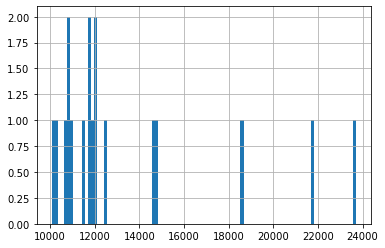

In [28]:
for genre in all_genres:
    filter_by_genre = data[data.apply(lambda x: genre in x['standard_genre'], axis = 1)]
    print(genre, ': ', len(filter_by_genre))
    print(filter_by_genre.describe())
    print(len(filter_by_genre[filter_by_genre['summary_len'] > 10000]))
    filter_by_genre[filter_by_genre['summary_len'] > 10000]['summary_len'].hist(bins=100)
    break